# GRIP - SPARKS FOUNDATION

## Author - Muruganandam V G

### Task 6  -  Prediction Using Decision Tree Algorithm

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



### Reading the data and converting into pandas dataframe

In [2]:
data =pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking for the null values if any

In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape


(150, 6)

In [8]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Plotting the graph among each variable using pairploat

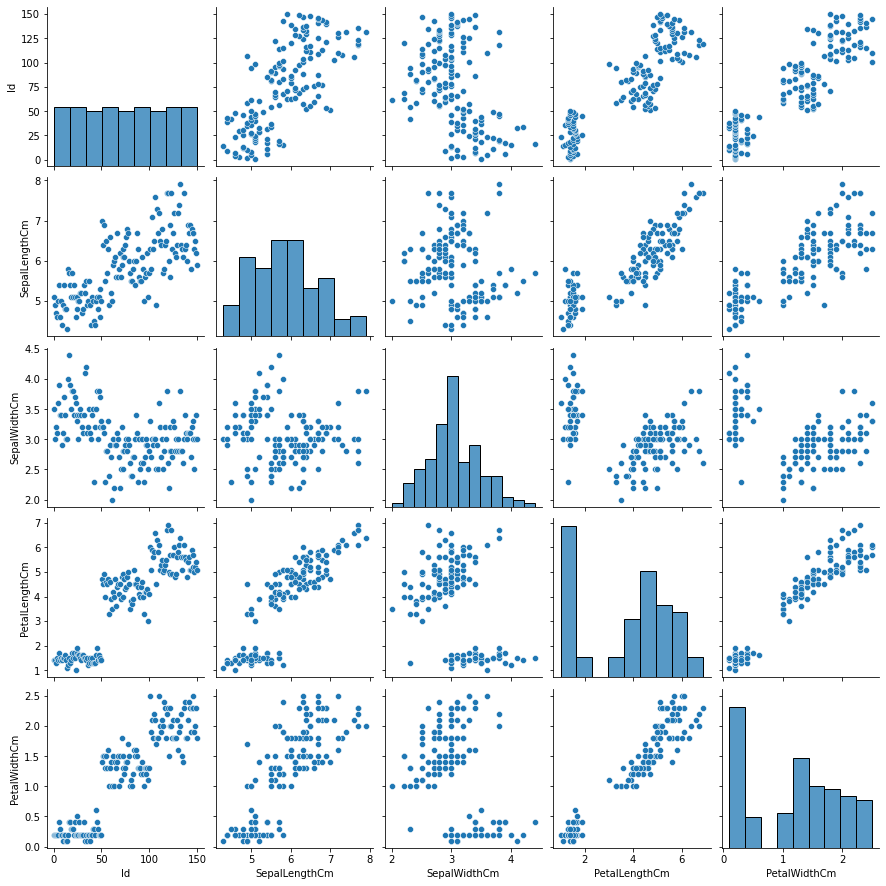

In [9]:
sns.pairplot(data)

### Defining the map function to assign numerical value to the categorical variables

In [10]:
map = {
    "Species":{
        "Iris-virginica":1,
        "Iris-setosa":2,
        "Iris-versicolor":3
    }
}

In [11]:
data=data.replace(map)

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


### Dropping the unnecessary columns

In [13]:
data.drop("Id",axis=1,inplace=True)

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


### Evaluating the correlation matrix to know the correlation between each variables

In [15]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.322522
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.192719
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.299942
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.375715
Species,-0.322522,-0.192719,-0.299942,-0.375715,1.000000


## Visualing the correlation matrix using heatmap to understand better

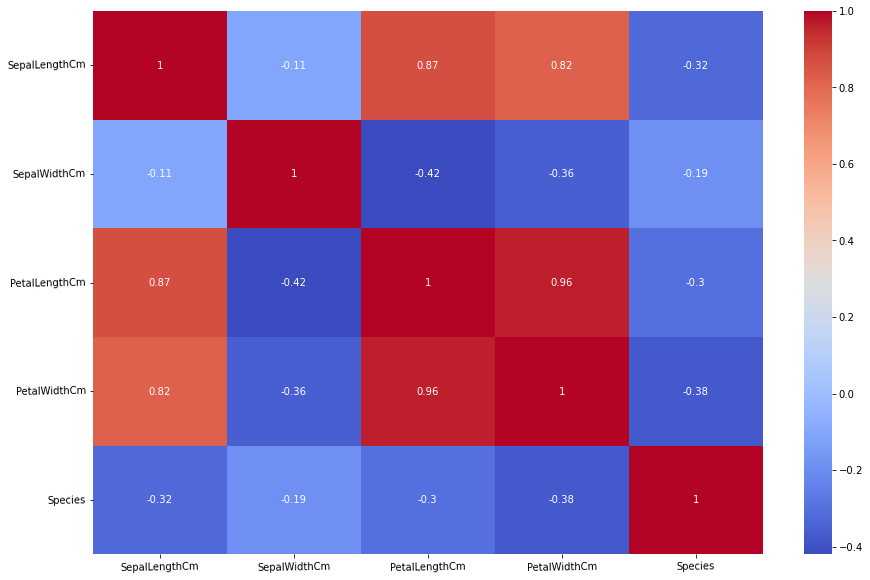

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(data.corr(), annot=True,cmap="coolwarm")
plt.xticks(rotation=1)
plt.yticks(rotation=1);

In [17]:
np.random.seed(42)
X=data.drop("Species",axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y=data['Species']
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Species, dtype: int64

### Splitting the data into train and test data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25)

In [20]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(112, 4) (112,) (38, 4) (38,)


### Defining the decision tree algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [22]:
Y_pred=model.predict(X_test)
Y_pred

array([3, 2, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2], dtype=int64)

In [23]:
Y_test

73     3
18     2
118    1
78     3
76     3
31     2
64     3
141    1
68     3
82     3
110    1
12     2
36     2
9      2
19     2
56     3
104    1
69     3
55     3
132    1
29     2
127    1
26     2
128    1
131    1
145    1
108    1
143    1
45     2
30     2
22     2
15     2
65     3
11     2
42     2
146    1
51     3
27     2
Name: Species, dtype: int64

### Comparing the Actual and predicted values

In [24]:
comparison=pd.DataFrame()
comparison['prediction']=Y_pred
comparison['Actual']=np.asarray(Y_test)

In [25]:
comparison.head(8)

,prediction,Actual
0,3,3
1,2,2
2,1,1
3,3,3
4,3,3
5,2,2
6,3,3
7,1,1


### Plotting heatmap for confusion matrix

<AxesSubplot:>

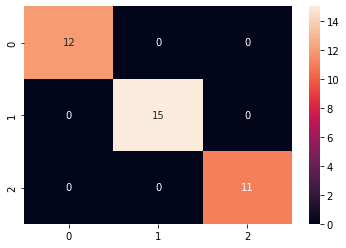

In [26]:
from sklearn.metrics import confusion_matrix, classification_report 
cm=confusion_matrix(Y_pred,Y_test)
sns.heatmap(cm,annot=True)

### Classification Report

In [27]:
from sklearn import tree
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Text(0.5, 1.0, 'Predicted Vs Actual values')

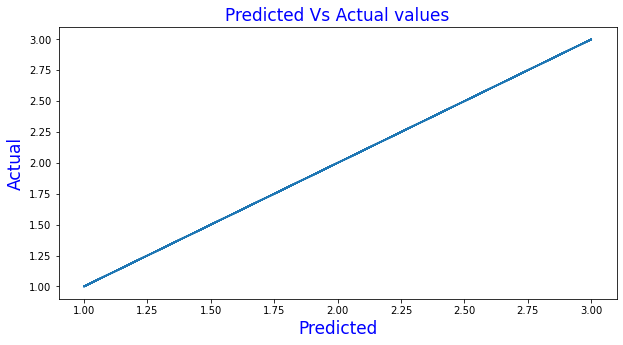

In [28]:
plt.figure(figsize=(10,5))
plt.plot(Y_pred,Y_test)
plt.xlabel("Predicted",color="blue",fontsize=17)
plt.ylabel("Actual",color="blue",fontsize=17)
plt.title("Predicted Vs Actual values",color="blue",fontsize=17)

### Visualing the decision tree 

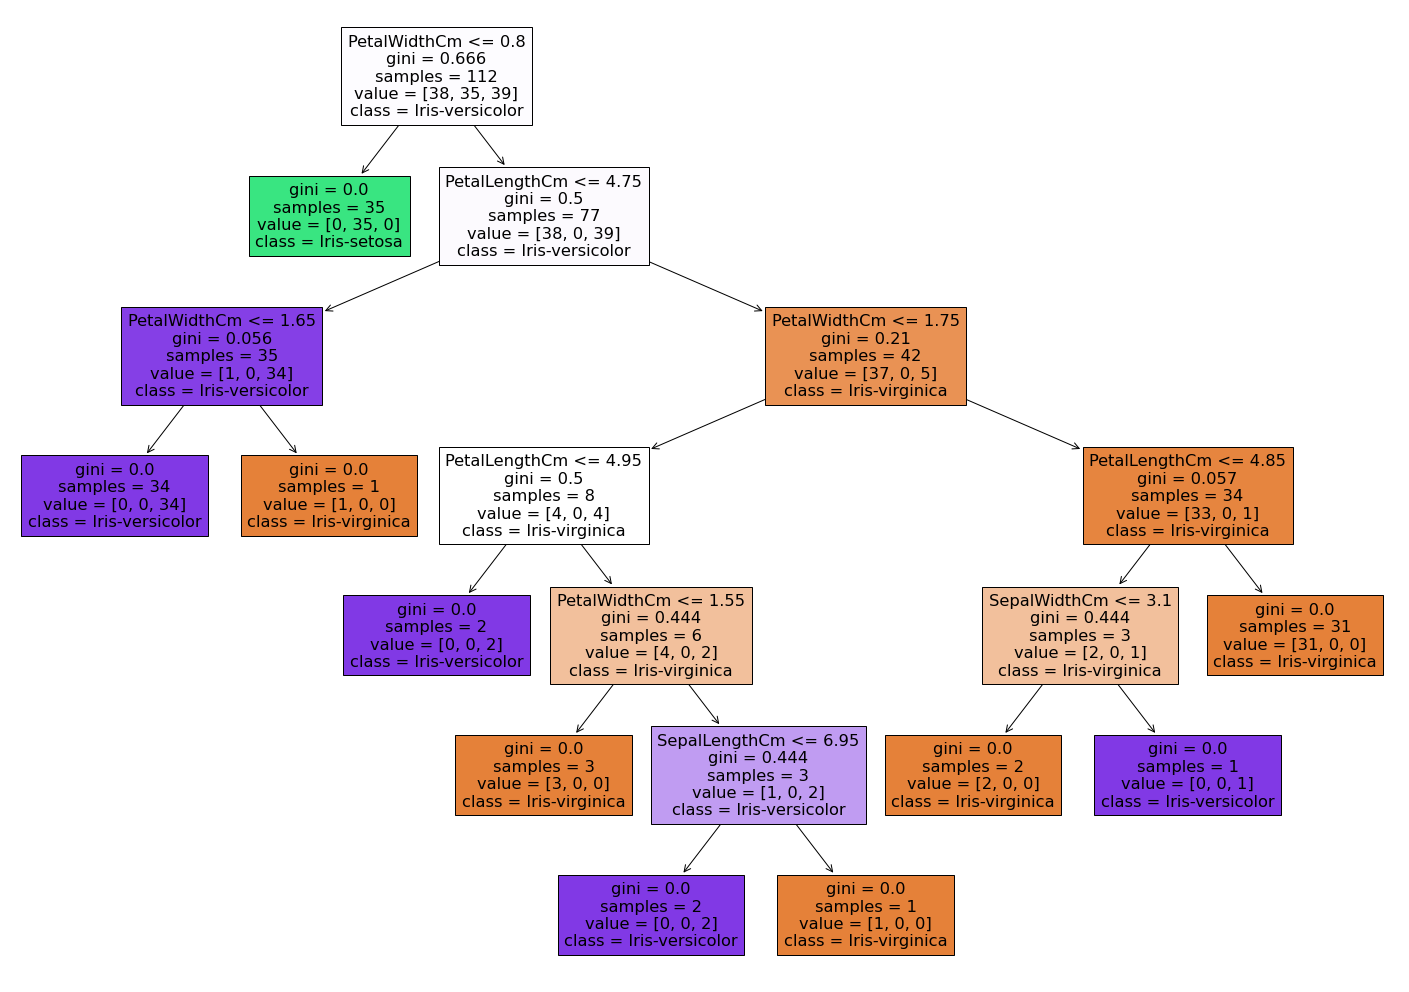

In [31]:
from sklearn import tree
plt.figure(figsize=(25,18))
tree.plot_tree(model,
               feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
               class_names=["Iris-virginica","Iris-setosa","Iris-versicolor"], filled=True);

## Converting decision tree into text format

In [33]:
print(tree.export_text(model))

|--- feature_3 <= 0.80
|   |--- class: 2
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 3
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 1

